# Sentiment Analysis from Images Text

## 1. Importing Libraries and Setting Up the Environment
This block imports necessary libraries and suppresses warnings. It also sets up the Kaggle API credentials and environment variables for downloading datasets.

numpy, pandas, matplotlib.pyplot, and tensorflow are standard libraries for data manipulation and machine learning.
ImageDataGenerator and specific layers from tensorflow.keras are used for building and processing the neural network.
warnings.filterwarnings('ignore') suppresses warnings for cleaner output.
Kaggle credentials are set as environment variables for dataset downloading.
*italicized text*

In [3]:
# Import necessary libraries
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Activation, Conv2D, MaxPooling2D, Dense, Flatten, Dropout, BatchNormalization
import warnings
warnings.filterwarnings('ignore')

## 2. Downloading and Preparing the Dataset
This block handles dataset downloading, unzipping, and setting up directory paths for training and testing data.

os.system executes the Kaggle command line for downloading and unzipping the dataset.
Directory paths for training and testing data are set.


In [4]:
# Directory settings
directory_train = 'train/'
directory_test = 'test/'

# Kaggle API Credentials
kaggle_user = "sjunbca"
kaggle_api_key = "a9d22a14ff656b11495b582ca6989c85"

# Environment Variables for Kaggle API
os.environ['KAGGLE_USERNAME'] = kaggle_user
os.environ['KAGGLE_KEY'] = kaggle_api_key


In [5]:
lis [rn;e valalo]

['.config', 'test', 'train', 'emotion-detection-fer.zip', 'sample_data']
['sad', 'neutral', 'surprised', 'disgusted', 'fearful', 'happy', 'angry']


## 3. Data Visualization and Analysis
This section loads the image data from directories, visualizes it, and performs a basic analysis of the dataset distribution.


Images from each category (emotion) are displayed.
The distribution of images across different categories is visualized using pie charts.

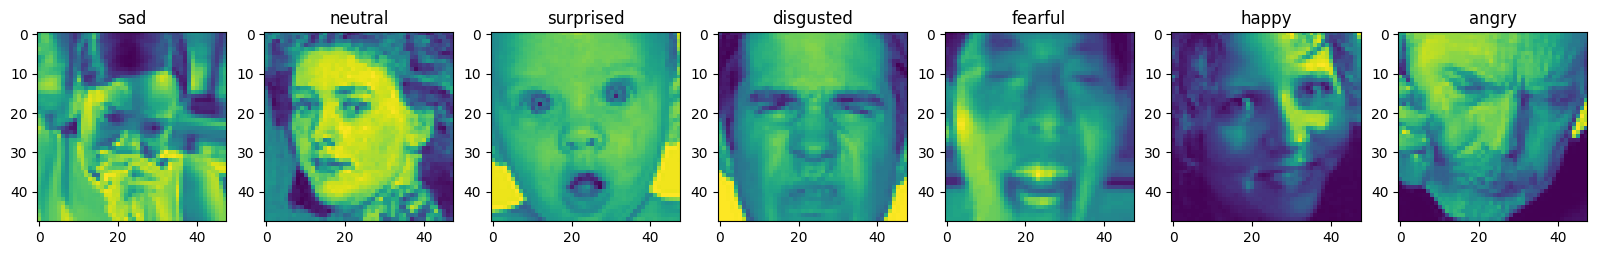

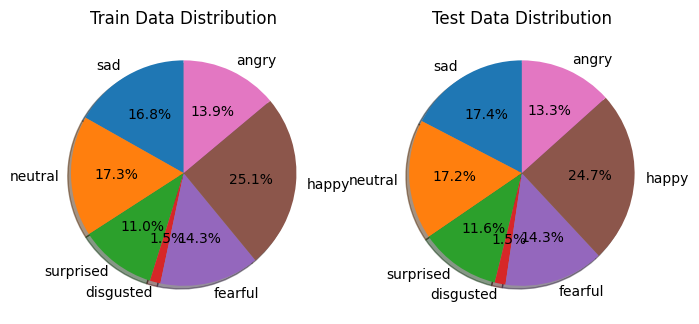

In [6]:
# Gathering target variables
emotion_categories = os.listdir(directory_train)

# Visualizing the first image of each category
fig, axes = plt.subplots(1, 7, figsize=(20,8))
for idx, emotion in enumerate(emotion_categories):
    img_path = os.path.join(directory_train, emotion, os.listdir(os.path.join(directory_train, emotion))[0])
    axes[idx].imshow(plt.imread(img_path))
    axes[idx].set_title(emotion)
plt.show()

# Counting training and test images
train_counts = np.array([len(os.listdir(os.path.join(directory_train, cat))) for cat in emotion_categories])
test_counts = np.array([len(os.listdir(os.path.join(directory_test, cat))) for cat in emotion_categories])

# Pie charts for training and test distributions
fig, axes = plt.subplots(1, 2, figsize=(8,4))
axes[0].pie(train_counts, labels=emotion_categories, autopct='%1.1f%%', shadow=True, startangle=90)
axes[1].pie(test_counts, labels=emotion_categories, autopct='%1.1f%%', shadow=True, startangle=90)
axes[0].set_title('Train Data Distribution')
axes[1].set_title('Test Data Distribution')
plt.show()

In [7]:
# Printing the count of images in each category
for category in emotion_categories:
    print(f'Emotion: {category}')
    print(f'\tTraining: {len(os.listdir(os.path.join(directory_train, category)))}')
    print(f'\tTesting: {len(os.listdir(os.path.join(directory_test, category)))}')

Emotion: sad
	Training: 4830
	Testing: 1247
Emotion: neutral
	Training: 4965
	Testing: 1233
Emotion: surprised
	Training: 3171
	Testing: 831
Emotion: disgusted
	Training: 436
	Testing: 111
Emotion: fearful
	Training: 4097
	Testing: 1024
Emotion: happy
	Training: 7215
	Testing: 1774
Emotion: angry
	Training: 3995
	Testing: 958


## 4. Setting Up Image Data Generators
This block configures the ImageDataGenerator for training and testing. It sets parameters for data augmentation and normalization.


ImageDataGenerator is used for real-time data augmentation and normalization.
train_datagen and test_datagen are configured for training and testing data, respectively.
The data generators load images from the directories, apply transformations, and prepare them for model training and evaluation.

In [8]:
# Image Data Generators
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.3)
test_datagen = ImageDataGenerator(rescale=1./255)

# Parameters for data generators
image_size = (48, 48)
batch_size = 64

train_gen_args = {'target_size': image_size, 'color_mode': 'grayscale', 'batch_size': batch_size, 'class_mode': 'categorical'}
test_gen_args = {'target_size': image_size, 'color_mode': 'grayscale', 'batch_size': batch_size, 'class_mode': 'categorical', 'shuffle': False}

# Data generators
train_data = train_datagen.flow_from_directory(directory_train, subset='training', **train_gen_args)
validation_data = train_datagen.flow_from_directory(directory_train, subset='validation', **train_gen_args)
test_data = test_datagen.flow_from_directory(directory_test, **test_gen_args)


Found 20099 images belonging to 7 classes.
Found 8610 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


## 5. Building and Compiling the Model
This section defines the architecture of the Convolutional Neural Network (CNN) and compiles it.

The CNN model is defined using tf.keras.Sequential. It includes convolutional layers, activation layers, batch normalization, and dense layers.
The final layer uses softmax activation for multi-class classification.
The model is compiled with the Adam optimizer and categorical crossentropy loss function, suitable for multi-class classification tasks.


Below code constructs a Convolutional Neural Network (CNN) using TensorFlow and Keras, designed for classifying 48x48 pixel grayscale images into one of seven classes. The model includes:

1. Two Convolutional Layers: Each with 32 filters of size 3x3, ReLU activation, and He normal weight initialization. Batch normalization follows each layer for stabilizing learning.
2. Pooling and Dropout: A max pooling layer reduces spatial dimensions, and dropout layers (0.2 and 0.5) are included to prevent overfitting.
3. Flattening: Converts the 2D output to a 1D array for the dense layers.
4. Dense Layers: A dense layer with 64 units and ReLU activation, followed by a dropout layer, and another dense layer with 7 units for class output.
5. Output Activation: A softmax activation function is used in the output layer for multi-class probability distribution.

The model's structure and parameters are summarized using model.summary(), providing an overview of the model's architecture, including layer types and output shapes.

In [12]:
# Model building
model = tf.keras.Sequential([
    Conv2D(32, (3,3), padding='same', kernel_initializer='he_normal', input_shape=(48,48,1)),
    Activation('relu'),
    BatchNormalization(),
    Conv2D(32, (3,3), padding='same', kernel_initializer='he_normal'),
    Activation('relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.2),
    # More layers can be added here in the same pattern
    Flatten(),
    Dense(64, kernel_initializer='he_normal'),
    Activation('relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(7, kernel_initializer='he_normal'),
    Activation('softmax')
])

model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 32)        320       
                                                                 
 activation (Activation)     (None, 48, 48, 32)        0         
                                                                 
 batch_normalization (Batch  (None, 48, 48, 32)        128       
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 48, 48, 32)        9248      
                                                                 
 activation_1 (Activation)   (None, 48, 48, 32)        0         
                                                                 
 batch_normalization_1 (Bat  (None, 48, 48, 32)        128       
 chNormalization)                                       

In [15]:
# compile and run

model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.0005),loss='categorical_crossentropy',metrics=['accuracy'])
# history = model.fit(train, validation_data=valid, epochs=200)
history = model.fit(train_data, validation_data=validation_data , epochs=10)

Epoch 1/10
315/315 [==============================] - 176s 552ms/step - loss: 1.9246 - accuracy: 0.3172 - val_loss: 1.8300 - val_accuracy: 0.3466
Epoch 2/10
315/315 [==============================] - 173s 548ms/step - loss: 1.5000 - accuracy: 0.4327 - val_loss: 1.4471 - val_accuracy: 0.4458
Epoch 3/10
315/315 [==============================] - 172s 547ms/step - loss: 1.3481 - accuracy: 0.4923 - val_loss: 1.3884 - val_accuracy: 0.4715
Epoch 4/10
315/315 [==============================] - 171s 543ms/step - loss: 1.2470 - accuracy: 0.5410 - val_loss: 1.3420 - val_accuracy: 0.4869
Epoch 5/10
315/315 [==============================] - 169s 536ms/step - loss: 1.1488 - accuracy: 0.5731 - val_loss: 1.4150 - val_accuracy: 0.4866
Epoch 6/10
315/315 [==============================] - 166s 526ms/step - loss: 1.0651 - accuracy: 0.6110 - val_loss: 1.3696 - val_accuracy: 0.4844
Epoch 7/10
315/315 [==============================] - 160s 509ms/step - loss: 0.9806 - accuracy: 0.6423 - val_loss: 1.4190 -

Below code uses Matplotlib to create a line graph that illustrates the performance of a Convolutional Neural Network (CNN) over training epochs. Specifically, it plots two lines: one showing the model's accuracy on the training dataset and the other its accuracy on a validation dataset across different epochs. The 'accuracy' line shows how well the model is learning from the training data, while the 'validation accuracy' line indicates how well the model generalizes to new, unseen data. The x-axis of the graph represents the number of training epochs, and the y-axis shows the accuracy as a percentage. The plot includes a legend in the upper left corner for easy differentiation between training and validation accuracy, and it's titled 'CNN Metrics (Accuracy)' to reflect its content.

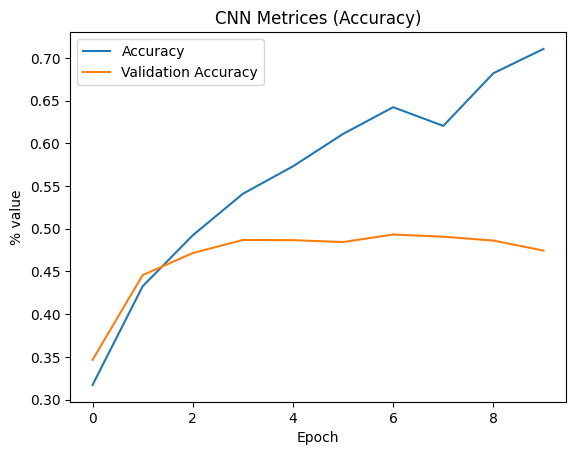

In [16]:
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('CNN Metrices (Accuracy)')
plt.ylabel('% value')
plt.xlabel('Epoch')
plt.legend(loc="upper left")
plt.show()

Below Code uses Matplotlib for plotting, but this time it focuses on visualizing the loss metrics of a Convolutional Neural Network (CNN) during its training. The code generates a line graph with two key lines:

### Observations from the plot:

Learning: The CNN is learning as indicated by the increasing training accuracy.

Overfitting Potential: There's a notable gap between the training accuracy and the validation accuracy. This could indicate that the model might be overfitting to the training data, meaning it's learning patterns specific to the training data that don't generalize well to new data.

Plateauing Validation Accuracy: The validation accuracy seems to plateau or even slightly decrease after a few epochs, which could suggest that further training may not result in better performance on the validation set.

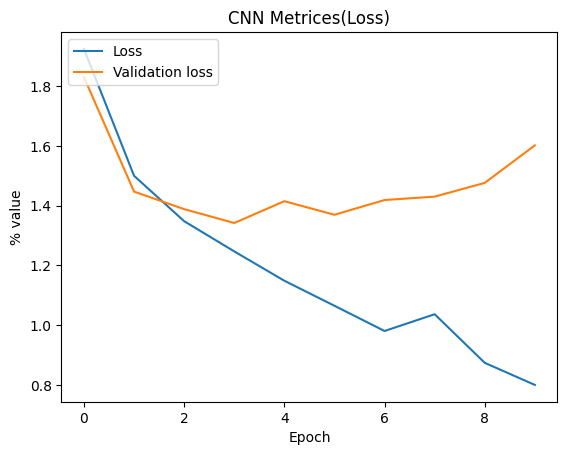

In [17]:
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title('CNN Metrices(Loss)')
plt.ylabel('% value')
plt.xlabel('Epoch')
plt.legend(loc="upper left")
plt.show()

### Observations from the plot:

Improving Performance: Initially, both the training loss and the validation loss decrease, which suggests that the network is learning and improving its performance.

Divergence of Losses: At a certain point, the validation loss begins to plateau and then increases slightly, while the training loss continues to decrease. This divergence is a classic sign of overfitting, where the model is learning to predict the training data very well but is failing to generalize those predictions to new data.

Early Stopping Point: Ideally, training should stop when the validation loss is at its lowest, as continuing to train beyond this point can lead to a model that is overfit to the training data.

## 6. Testing and evaluation


Below code is for evaluating a machine learning model's performance on a test dataset. It first predicts class labels for the test data, then aligns these predictions with the actual labels. It computes a confusion matrix, which is a table used to describe the performance of a classification model. The confusion matrix shows the counts of true positive, false positive, true negative, and false negative predictions. This visualization is helpful for understanding the model's performance, particularly in terms of how many instances of each class were correctly or incorrectly predicted by the model.







113/113 [==============================] - 15s 131ms/step


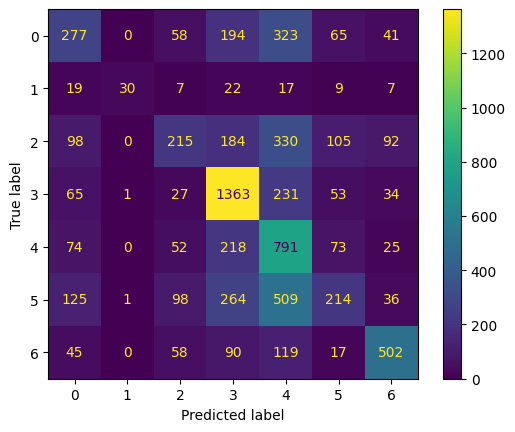

In [21]:
y_pred = model.predict(test_data)

y_pred_labels = []
for i in y_pred:
    y_pred_labels.append(np.argmax(i))

y_actual = test_data.classes[test_data.index_array]

from sklearn import metrics
cm = metrics.confusion_matrix(y_actual, y_pred_labels)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

From this confusion matrix, we can observe that:

Some classes have a high number of correct predictions, such as class 4 with 1363 correct predictions.
Certain classes are often confused with each other, such as true label 0 being frequently misclassified as label 2.
The matrix is not symmetric, which means that the types of misclassification are not equal; some classes are more likely to be confused than others.


In [46]:
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y_actual, y_pred_labels, digits=4))

              precision    recall  f1-score   support

           0     0.3940    0.2891    0.3335       958
           1     0.9375    0.2703    0.4196       111
           2     0.4175    0.2100    0.2794      1024
           3     0.5837    0.7683    0.6634      1774
           4     0.3409    0.6415    0.4453      1233
           5     0.3993    0.1716    0.2400      1247
           6     0.6811    0.6041    0.6403       831

    accuracy                         0.4726      7178
   macro avg     0.5363    0.4221    0.4316      7178
weighted avg     0.4777    0.4726    0.4471      7178



Observations from the  report:

Class 1 has the highest precision, which means that when the model predicts class 1, it is correct 93.75% of the time. However, its recall is low (27.03%), indicating that it fails to identify many actual instances of class 1.

Class 3 has the highest recall, meaning it correctly identifies 76.83% of all actual instances of class 3. However, its precision is lower than class 1, meaning it has more false positives.

The F1-Score is highest for class 3, showing it has a relatively better balance of precision and recall compared to other classes.

The accuracy of the entire model across all classes is 47.26%, which is not very high, indicating a moderate overall performance.

The macro average F1-Score is 43.16%, indicating the average performance across classes, without considering the support.

The weighted average F1-Score is 44.71%, which is higher than the macro avg because it accounts for the support of each class, giving more weight to classes with more instances.

This report suggests the model is better at identifying some classes over others and that there may be an imbalance in the dataset or the model may not generalize well across all classes. It also indicates that for some classes, the model is precise but not sensitive (Class 1), while for others, it is sensitive but not precise (Class 3). Improvements could possibly be made by addressing class imbalance, tuning the model, or gathering more data for underrepresented classes.

# Implementing the model with images captured [ simulation of a screen shot of video conference ]


In [35]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


1/1 [==============================] - 0s 36ms/step


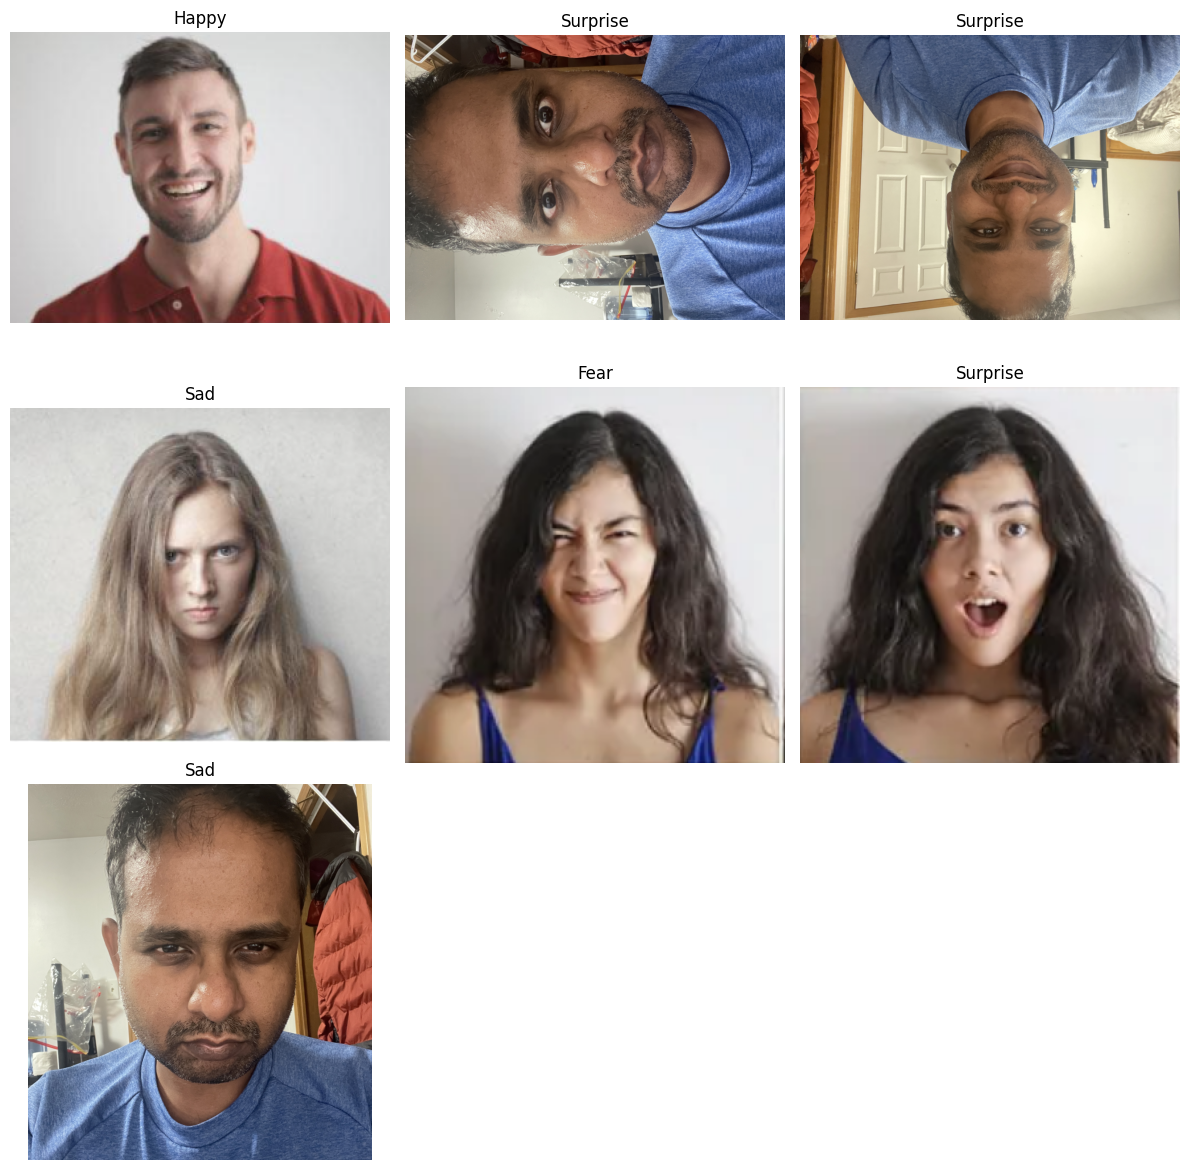

In [45]:
from tensorflow.keras.preprocessing.image import img_to_array
from PIL import Image
import numpy as np
import os
import matplotlib.pyplot as plt

# Function to preprocess the image
def preprocess_image(image_path):
    image = Image.open(image_path)
    image = image.convert('L')  # Convert to grayscale
    image = image.resize((48, 48))  # Resize to match model's expected input
    image_array = img_to_array(image) / 255.0  # Normalize
    image_array = np.expand_dims(image_array, axis=0)  # Add batch dimension
    return image_array

# Emotion categories (replace with your categories)
emotion_categories = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']

# Path to your images folder
folder_path = '/content/drive/MyDrive/Teaching/TME_6015/Final_Project/sentiment_images/one'

# Lists to store images and predictions
images = []
predictions = []

# Check if folder exists
if os.path.exists(folder_path) and os.path.isdir(folder_path):
    # Loop over images in folder
    for image_name in os.listdir(folder_path):
        image_path = os.path.join(folder_path, image_name)
        if os.path.isfile(image_path):
            processed_image = preprocess_image(image_path)
            prediction = model.predict(processed_image)
            predicted_class = np.argmax(prediction, axis=1)
            emotion_label = emotion_categories[predicted_class[0]]

            # Store image and prediction
            img = Image.open(image_path)
            images.append(img)
            predictions.append(emotion_label)

    # Number of images
    num_images = len(images)

    # Number of rows for 3 columns
    num_rows = (num_images + 2) // 3

    # Plotting
    plt.figure(figsize=(12, 4 * num_rows))
    for i in range(num_images):
        plt.subplot(num_rows, 3, i + 1)
        plt.imshow(images[i], cmap='gray')
        plt.title(predictions[i])
        plt.axis('off')
    plt.tight_layout()
    plt.show()
else:
    print("Folder not found. Please check the path.")
